In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#pip install pandas openpyxl

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
# Specify the path to your Excel file
excel_file_path = '"C/Users/dhara/OneDrive/Desktop/Business project/python files/Data.xlsx"'

# Specify the name of the sheet you want to read
sheet_name = 'World'

# Read the specified sheet into a pandas DataFrame
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

OSError: [Errno 22] Invalid argument: '"C/Users/dhara/OneDrive/Desktop/Business project/python files/Data.xlsx"'

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df1=df

In [ ]:
df1.head()

,Year,EV Sales (World)
0,2010,7000
1,2011,40000
2,2012,58000
3,2013,110000
4,2014,200000


In [ ]:
df1['datetime'] = pd.to_datetime(df1['Year'], format='%Y')

In [ ]:
df1

,Year,EV Sales (World),datetime
0,2010,7000,2010-01-01
1,2011,40000,2011-01-01
2,2012,58000,2012-01-01
3,2013,110000,2013-01-01
4,2014,200000,2014-01-01
5,2015,330000,2015-01-01
6,2016,470000,2016-01-01
7,2017,760000,2017-01-01
8,2018,1400000,2018-01-01
9,2019,1500000,2019-01-01


In [ ]:
df1.set_index('datetime',inplace=True)

In [ ]:
df1

,Year,EV Sales (World)
datetime,,
2010-01-01,2010,7000
2011-01-01,2011,40000
2012-01-01,2012,58000
2013-01-01,2013,110000
2014-01-01,2014,200000
2015-01-01,2015,330000
2016-01-01,2016,470000
2017-01-01,2017,760000
2018-01-01,2018,1400000


In [ ]:
df1 = df1.drop(columns='Year')

In [ ]:
df1

,EV Sales (World)
datetime,
2010-01-01,7000
2011-01-01,40000
2012-01-01,58000
2013-01-01,110000
2014-01-01,200000
2015-01-01,330000
2016-01-01,470000
2017-01-01,760000
2018-01-01,1400000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2010-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   EV Sales (World)  15 non-null     int64
dtypes: int64(1)
memory usage: 240.0 bytes


<Figure size 1500x500 with 0 Axes>

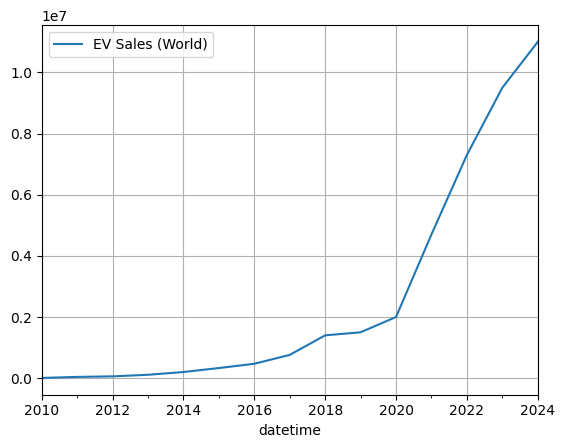

In [ ]:
fig = plt.figure(figsize = (15,5))

df1.plot();
plt.grid();

In [ ]:
df1.describe()

,EV Sales (World)
count,1.500000e+01
mean,2.625000e+06
std,3.707571e+06
min,7.000000e+03
25%,1.550000e+05
50%,7.600000e+05
75%,3.350000e+06
max,1.100000e+07


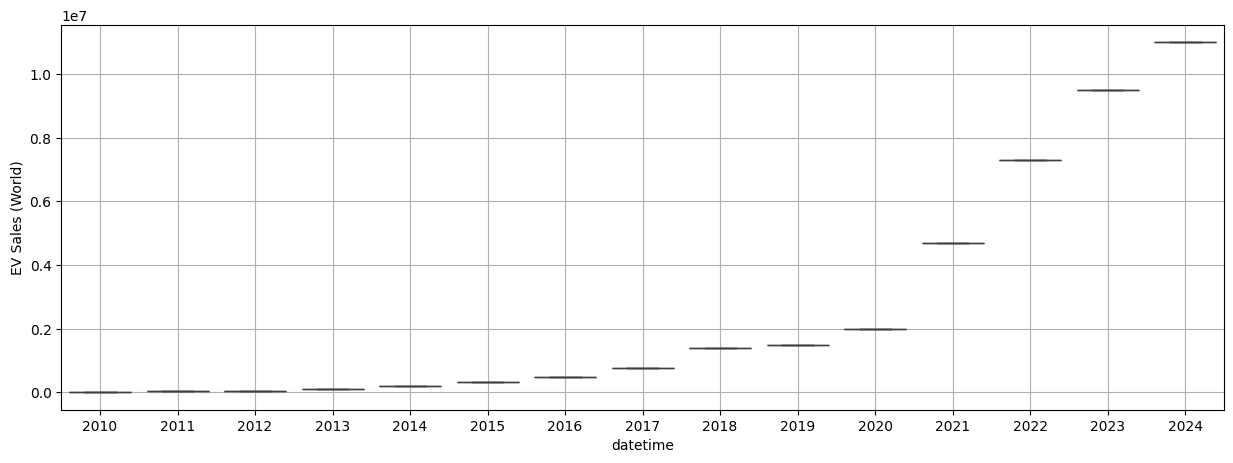

In [ ]:
fig = plt.figure(figsize = (15,5))

sns.boxplot(x = df1.index.year,y = df1['EV Sales (World)'])
plt.grid();

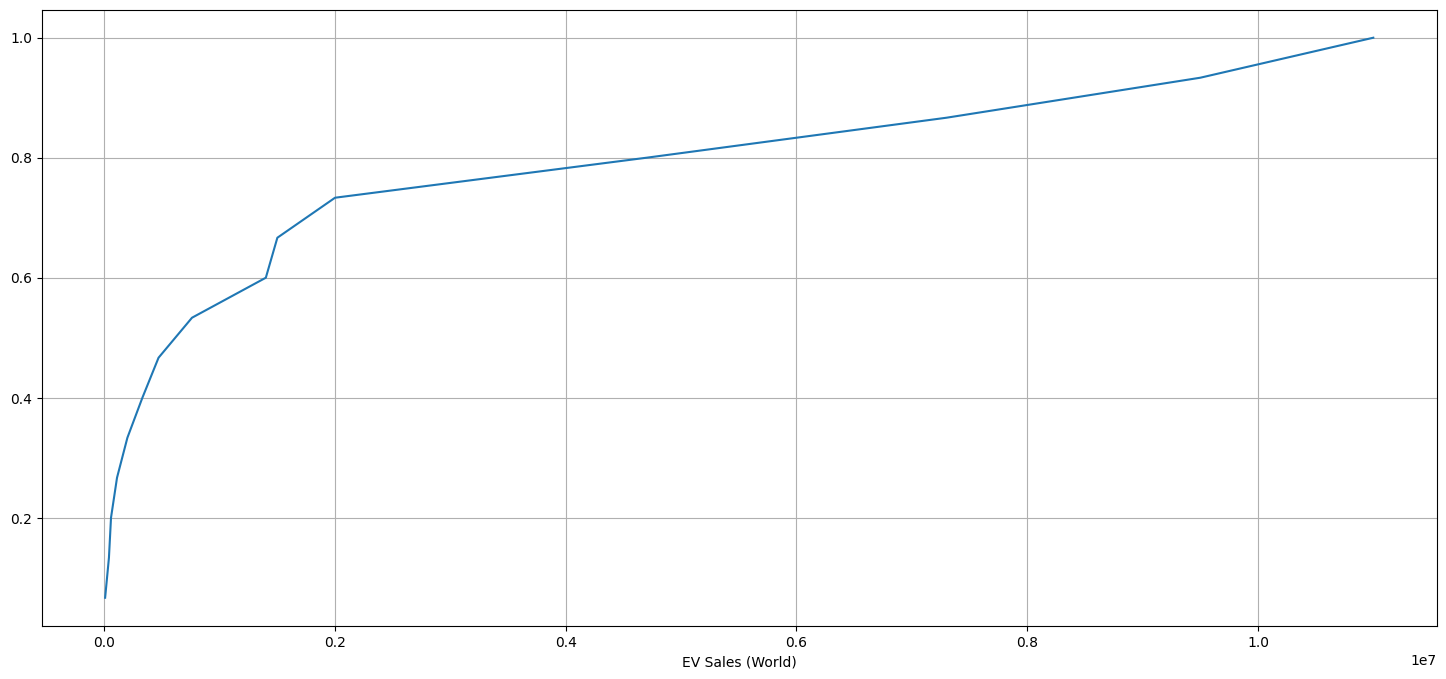

In [ ]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df1['EV Sales (World)'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('EV Sales (World)');

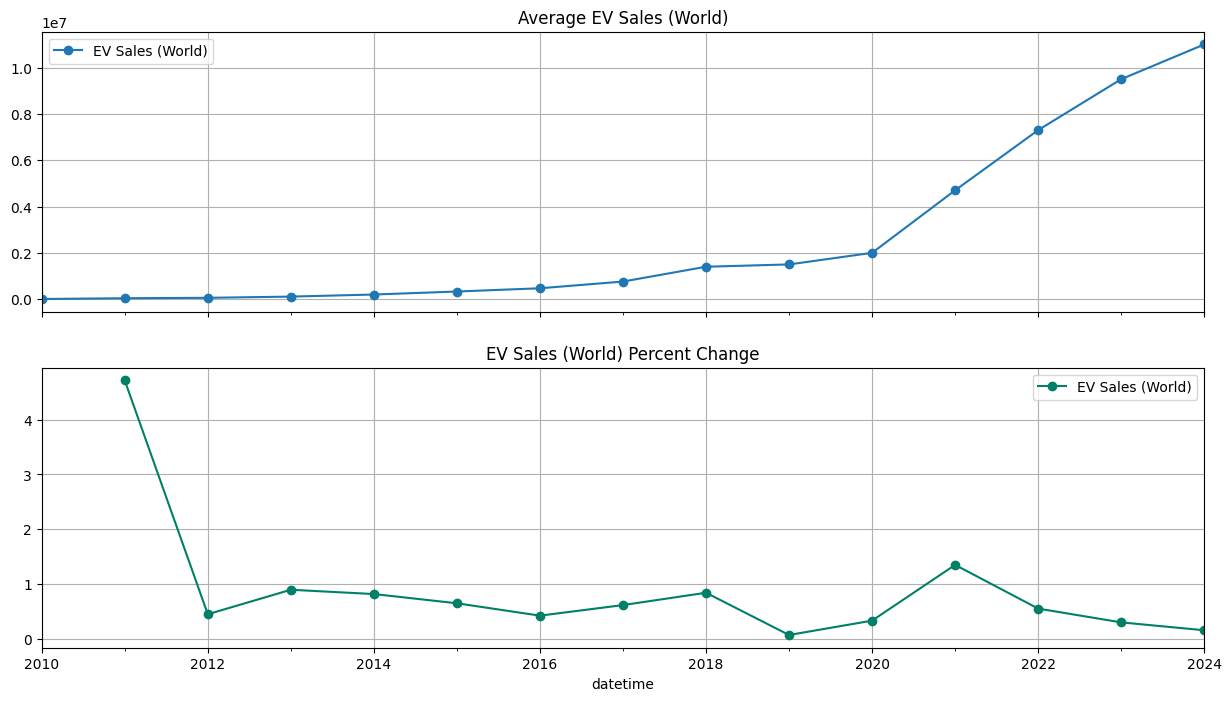

In [ ]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df1.index)["EV Sales (World)"].mean()
pct_change = df.groupby(df1.index)["EV Sales (World)"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average EV Sales (World)",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="EV Sales (World) Percent Change",grid=True)

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

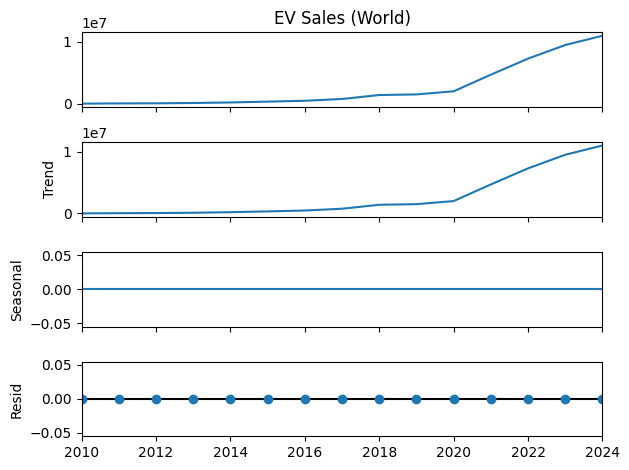

In [ ]:
decomposition = seasonal_decompose(df['EV Sales (World)'],model='additive')
decomposition.plot();

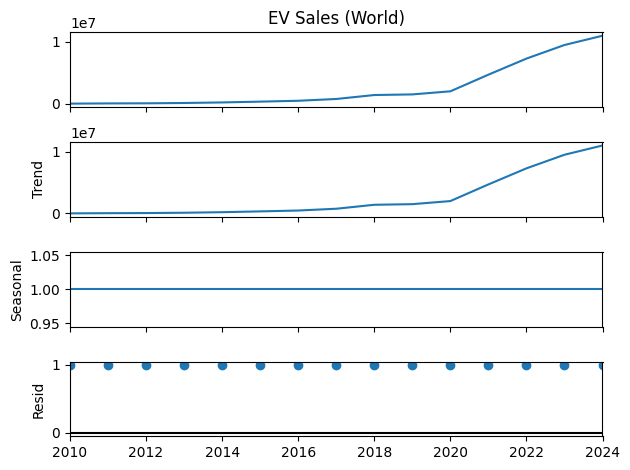

In [ ]:
decomposition = seasonal_decompose(df['EV Sales (World)'],model='multiplicative')
decomposition.plot();

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1500x1500 with 0 Axes>

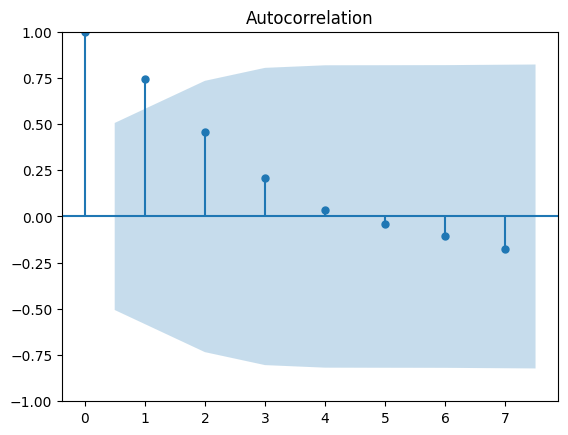

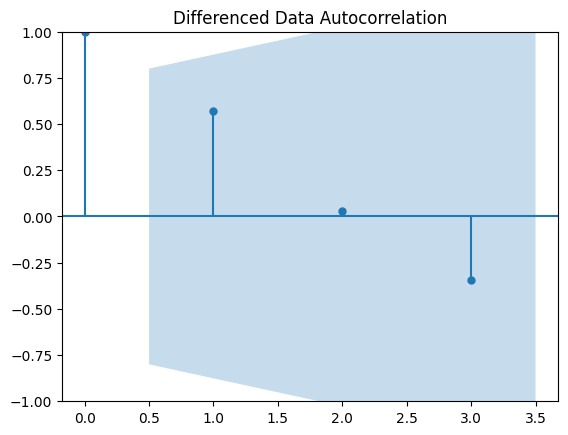

In [ ]:
plt.figure(figsize = (15, 15))

plot_acf(df['EV Sales (World)'])#,lags=50)
plot_acf(df['EV Sales (World)'].diff(9).dropna(),title='Differenced Data Autocorrelation')
plt.show()

In [ ]:
df1

,EV Sales (World)
datetime,
2010-01-01,7000
2011-01-01,40000
2012-01-01,58000
2013-01-01,110000
2014-01-01,200000
2015-01-01,330000
2016-01-01,470000
2017-01-01,760000
2018-01-01,1400000


In [ ]:
15*(0.7)

10.5

In [ ]:
df1.head()

,EV Sales (World)
datetime,
2010-01-01,7000
2011-01-01,40000
2012-01-01,58000
2013-01-01,110000
2014-01-01,200000


In [ ]:
train=df[df1.index.year < 2019]
test=df[df1.index.year >= 2019]

In [ ]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [ ]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Year,EV Sales (World)
datetime,,
2010-01-01,2010,7000
2011-01-01,2011,40000
2012-01-01,2012,58000
2013-01-01,2013,110000
2014-01-01,2014,200000


Last few rows of Training Data


,Year,EV Sales (World)
datetime,,
2014-01-01,2014,200000
2015-01-01,2015,330000
2016-01-01,2016,470000
2017-01-01,2017,760000
2018-01-01,2018,1400000


First few rows of Test Data


,Year,EV Sales (World)
datetime,,
2019-01-01,2019,1500000
2020-01-01,2020,2000000
2021-01-01,2021,4700000
2022-01-01,2022,7300000
2023-01-01,2023,9500000


Last few rows of Test Data


,Year,EV Sales (World)
datetime,,
2020-01-01,2020,2000000
2021-01-01,2021,4700000
2022-01-01,2022,7300000
2023-01-01,2023,9500000
2024-01-01,2024,11000000


In [ ]:
train = train.drop(columns='Year')

In [ ]:
test = test.drop(columns='Year')

In [ ]:
train.head()
test.head()

,EV Sales (World)
datetime,
2019-01-01,1500000
2020-01-01,2000000
2021-01-01,4700000
2022-01-01,7300000
2023-01-01,9500000


In [ ]:
print(train.shape)
print(test.shape)

(9, 1)
(6, 1)


In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
#EV Sales (World)

In [ ]:
train['EV Sales (World)']

,EV Sales (World)
datetime,
2010-01-01,7000
2011-01-01,40000
2012-01-01,58000
2013-01-01,110000
2014-01-01,200000
2015-01-01,330000
2016-01-01,470000
2017-01-01,760000
2018-01-01,1400000


In [ ]:
#from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#from statsmodels.tsa.arima.model.ARIMA import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['EV Sales (World)'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    # Use pd.concat instead of append
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 1, 0) - AIC:224.27962723469966
ARIMA(0, 1, 1) - AIC:225.98517901261545
ARIMA(0, 1, 2) - AIC:220.93434095092604


/tmp/ipython-input-3398801793.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 1, 0) - AIC:216.71774327133102
ARIMA(1, 1, 1) - AIC:214.00966065066746
ARIMA(1, 1, 2) - AIC:220.289671873621
ARIMA(2, 1, 0) - AIC:217.21080862820332
ARIMA(2, 1, 1) - AIC:222.23829308411666
ARIMA(2, 1, 2) - AIC:222.26644192940424


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
4,"(1, 1, 1)",214.009661
3,"(1, 1, 0)",216.717743
6,"(2, 1, 0)",217.210809
5,"(1, 1, 2)",220.289672
2,"(0, 1, 2)",220.934341
7,"(2, 1, 1)",222.238293
8,"(2, 1, 2)",222.266442
0,"(0, 1, 0)",224.279627
1,"(0, 1, 1)",225.985179


In [ ]:
auto_ARIMA = ARIMA(train['EV Sales (World)'], order=(1,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:       EV Sales (World)   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -104.005
Date:                Wed, 24 Sep 2025   AIC                            214.010
Time:                        07:37:38   BIC                            214.248
Sample:                    01-01-2010   HQIC                           212.402
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.473      2.115      0.034       0.073       1.927
ma.L1          1.0000      0.964      1.038      0.299      -0.889       2.889
sigma2       6.07e+09   1.59e-10   3.82e+19      0.0

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['EV Sales (World)'],predicted_auto_ARIMA)
print(rmse**0.5)

2807128.3657401144


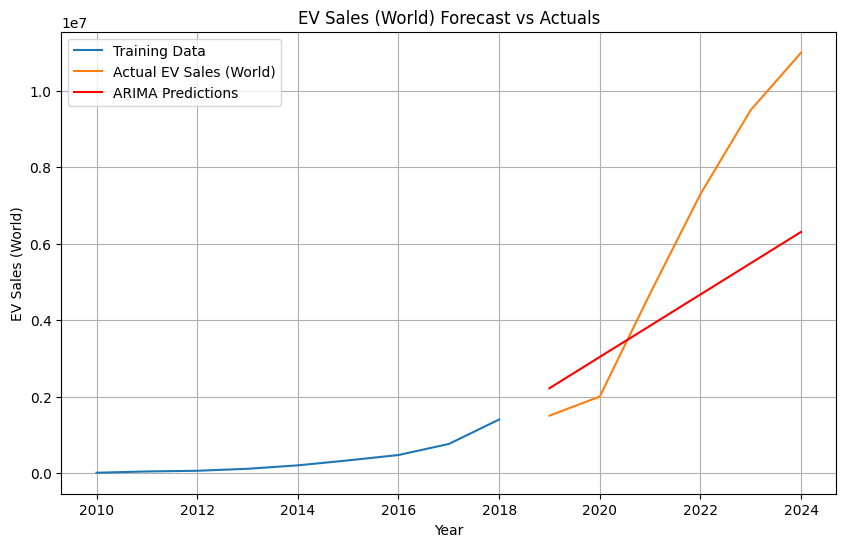

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['EV Sales (World)'], label='Training Data')
plt.plot(test.index, test['EV Sales (World)'], label='Actual EV Sales (World)')
plt.plot(test.index, predicted_auto_ARIMA, label='ARIMA Predictions', color='red')
plt.title('EV Sales (World) Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('EV Sales (World)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf

,RMSE
"ARIMA(1,1,1)",7.879970e+12


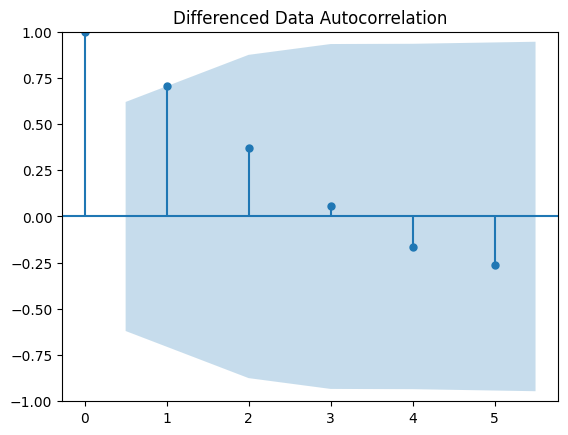

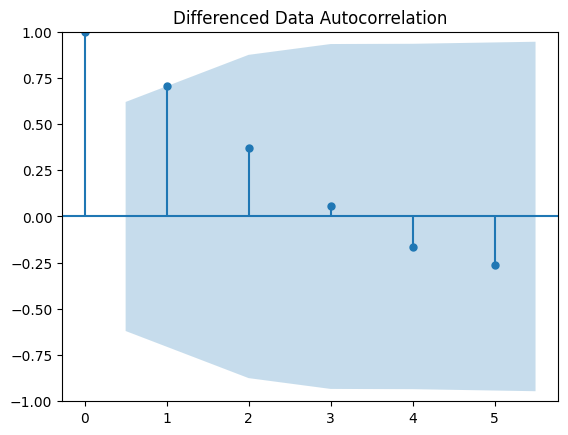

In [ ]:
plot_acf(df1['EV Sales (World)'].diff(5).dropna(),title='Differenced Data Autocorrelation')


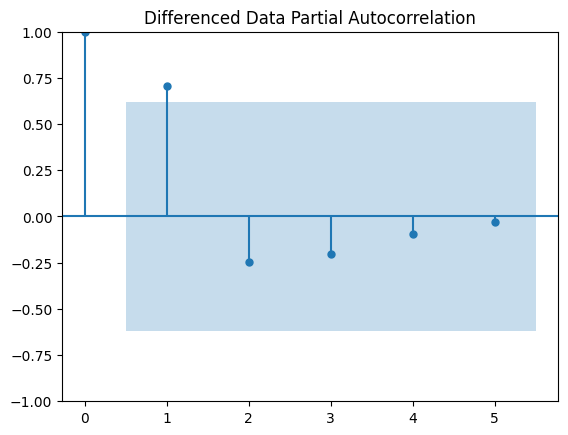

In [ ]:
plot_pacf(df1['EV Sales (World)'].diff(5).dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
manual_ARIMA = ARIMA(train['EV Sales (World)'].astype('float64'), order=(1,2,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:       EV Sales (World)   No. Observations:                    9
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -91.026
Date:                Wed, 24 Sep 2025   AIC                            186.051
Time:                        07:37:40   BIC                            185.943
Sample:                    01-01-2010   HQIC                           184.714
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.168      5.948      0.000       0.670       1.329
sigma2      5.057e+09   1.98e-11   2.55e+20      0.000    5.06e+09    5.06e+09
Ljung-Box (L1) (Q):                   0.63   Jarque-

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [ ]:
predicted_manual_ARIMA

,predicted_mean
2019-01-01,2.389898e+06
2020-01-01,3.729591e+06
2021-01-01,5.418979e+06
2022-01-01,7.457958e+06
2023-01-01,9.846426e+06
2024-01-01,1.258428e+07


In [ ]:
rmse = mean_squared_error(test['EV Sales (World)'],predicted_manual_ARIMA)
print(rmse)

1159208003181.8474


In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,2,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",7.879970e+12
"ARIMA(1,2,0)",1.159208e+12



Root Mean Squared Error (RMSE): 1076665.22


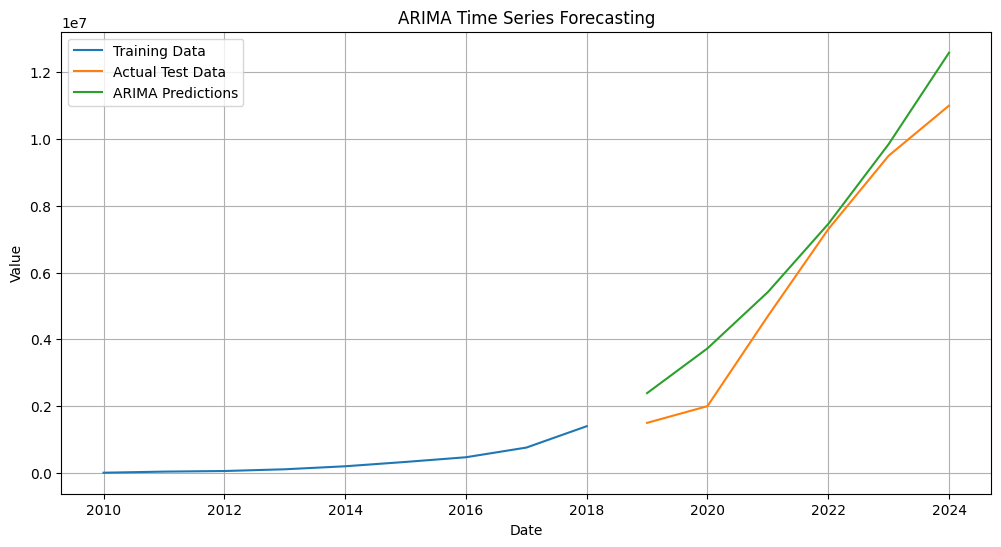

In [ ]:
forecast_steps = len(test)
predictions = results_manual_ARIMA.get_forecast(steps=forecast_steps)

# 5. Evaluate the model (optional)
rmse = np.sqrt(mean_squared_error(test['EV Sales (World)'], predictions.predicted_mean))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

# 6. Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['EV Sales (World)'], label='Training Data')
plt.plot(test.index, test['EV Sales (World)'], label='Actual Test Data')
plt.plot(predictions.predicted_mean.index, predictions.predicted_mean, label='ARIMA Predictions')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**Forecast**

In [ ]:
order = (1, 2, 0)

model = ARIMA(df1, order=order)
model_fit = model.fit()

print("ARIMA Model Summary:")
print(model_fit.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:       EV Sales (World)   No. Observations:                   15
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -193.075
Date:                Wed, 24 Sep 2025   AIC                            390.150
Time:                        07:37:41   BIC                            391.280
Sample:                    01-01-2010   HQIC                           389.918
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1125      0.410      0.275      0.784      -0.691       0.916
sigma2      5.025e+11   1.06e-12   4.73e+23      0.000    5.02e+11    5.02e+11
Ljung-Box (L1) (Q):            

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
# 4. Forecast for a future time period
# Define the number of steps to forecast into the future
forecast_steps = 6

# Generate the forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a future date range for the forecast index
last_date = df1.index[-1]
future_index = pd.to_datetime(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Y'))[1:] # Exclude the last_date itself

# Create a Series for the forecast with the correct index
forecast_series = pd.Series(forecast.values, index=future_index)

/tmp/ipython-input-4206370668.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_index = pd.to_datetime(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Y'))[1:] # Exclude the last_date itself


In [ ]:
forecast_mean = forecast
conf_int = model_fit.conf_int(alpha=0.05) # 95% confidence interval

print("Forecast Mean:")
print(forecast_mean)
print("\n95% Confidence Interval:")
print(conf_int)

Forecast Mean:
2025-01-01    1.242124e+07
2026-01-01    1.383362e+07
2027-01-01    1.524500e+07
2028-01-01    1.665627e+07
2029-01-01    1.806752e+07
2030-01-01    1.947878e+07
Freq: YS-JAN, Name: predicted_mean, dtype: float64

95% Confidence Interval:
                   0             1
ar.L1  -6.907264e-01  9.157568e-01
sigma2  5.024819e+11  5.024819e+11


In [ ]:
predictions.summary_frame(alpha=0.05).head()

EV Sales (World),mean,mean_se,mean_ci_lower,mean_ci_upper
2019-01-01,2.389898e+06,7.111523e+04,2.250515e+06,2.529281e+06
2020-01-01,3.729591e+06,2.248664e+05,3.288861e+06,4.170322e+06
2021-01-01,5.418979e+06,4.822444e+05,4.473797e+06,6.364160e+06
2022-01-01,7.457958e+06,8.590706e+05,5.774210e+06,9.141705e+06
2023-01-01,9.846426e+06,1.369316e+06,7.162616e+06,1.253024e+07


In [ ]:
forecast_series

,0
2025-12-31,1.242124e+07
2026-12-31,1.383362e+07
2027-12-31,1.524500e+07
2028-12-31,1.665627e+07
2029-12-31,1.806752e+07
2030-12-31,1.947878e+07


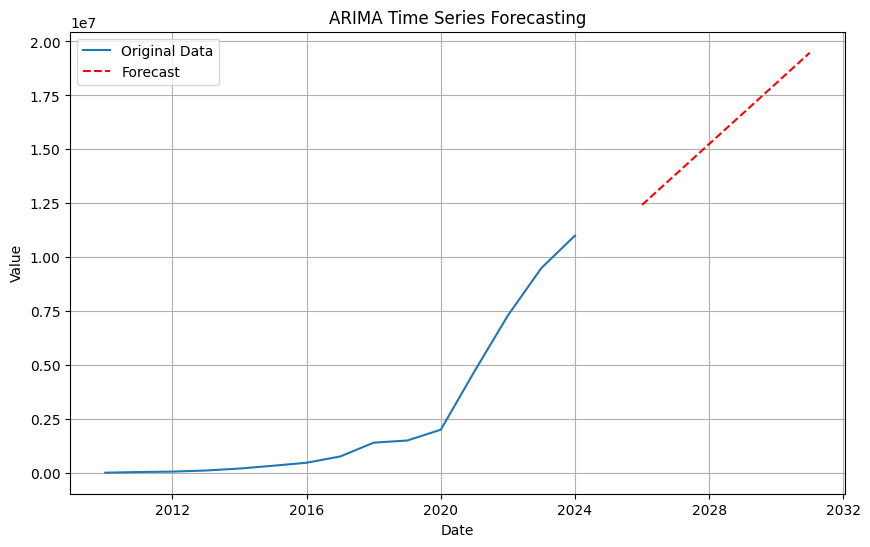

In [ ]:
# 5. Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df1, label='Original Data')
plt.plot(forecast_series, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### UK

In [ ]:
# Specify the path to your Excel file
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Data.xlsx'

# Specify the name of the sheet you want to read
sheet_name = 'UK'

# Read the specified sheet into a pandas DataFrame
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [ ]:
df

,Year,EV Sales (UK)
0,2010,240
1,2011,1200
2,2012,1600
3,2013,2600
4,2014,6700
5,2015,10000
6,2016,10000
7,2017,14000
8,2018,16000
9,2019,38000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           15 non-null     int64
 1   EV Sales (UK)  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [ ]:
df1=df

In [ ]:
df1.head()

,Year,EV Sales (UK)
0,2010,240
1,2011,1200
2,2012,1600
3,2013,2600
4,2014,6700


In [ ]:
df1['datetime'] = pd.to_datetime(df1['Year'], format='%Y')

In [ ]:
df1

,Year,EV Sales (UK),datetime
0,2010,240,2010-01-01
1,2011,1200,2011-01-01
2,2012,1600,2012-01-01
3,2013,2600,2013-01-01
4,2014,6700,2014-01-01
5,2015,10000,2015-01-01
6,2016,10000,2016-01-01
7,2017,14000,2017-01-01
8,2018,16000,2018-01-01
9,2019,38000,2019-01-01


In [ ]:
df1.set_index('datetime',inplace=True)

In [ ]:
df1

,Year,EV Sales (UK)
datetime,,
2010-01-01,2010,240
2011-01-01,2011,1200
2012-01-01,2012,1600
2013-01-01,2013,2600
2014-01-01,2014,6700
2015-01-01,2015,10000
2016-01-01,2016,10000
2017-01-01,2017,14000
2018-01-01,2018,16000


In [ ]:
df1 = df1.drop(columns='Year')

In [ ]:
df1

,EV Sales (UK)
datetime,
2010-01-01,240
2011-01-01,1200
2012-01-01,1600
2013-01-01,2600
2014-01-01,6700
2015-01-01,10000
2016-01-01,10000
2017-01-01,14000
2018-01-01,16000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2010-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   EV Sales (UK)  15 non-null     int64
dtypes: int64(1)
memory usage: 240.0 bytes


<Figure size 1500x500 with 0 Axes>

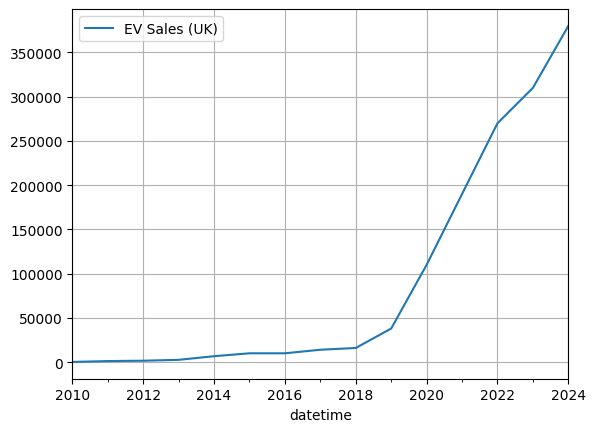

In [ ]:
fig = plt.figure(figsize = (15,5))

df1.plot();
plt.grid();

In [ ]:
df1.describe()

,EV Sales (UK)
count,15.000000
mean,90689.333333
std,131035.267852
min,240.000000
25%,4650.000000
50%,14000.000000
75%,150000.000000
max,380000.000000


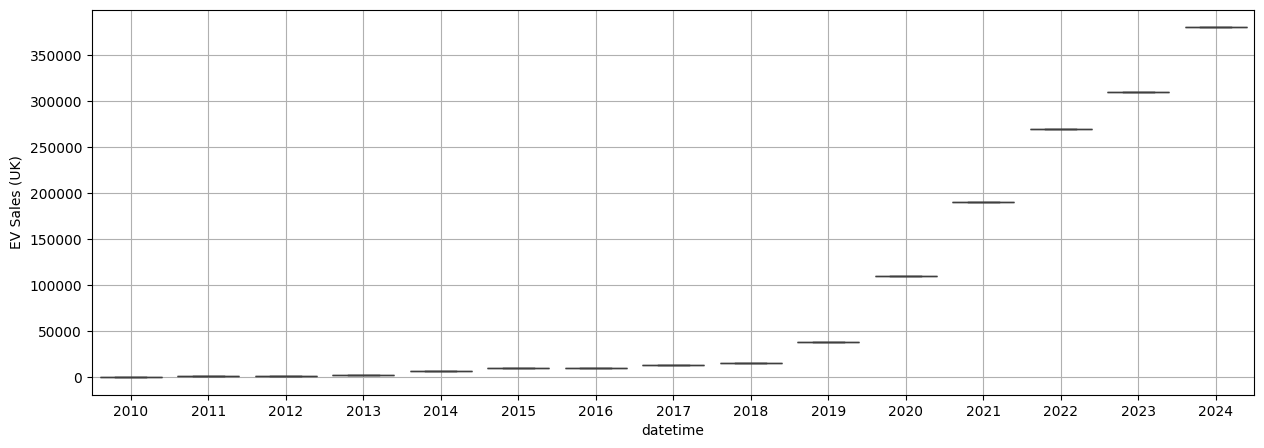

In [ ]:
fig = plt.figure(figsize = (15,5))

sns.boxplot(x = df1.index.year,y = df1['EV Sales (UK)'])
plt.grid();

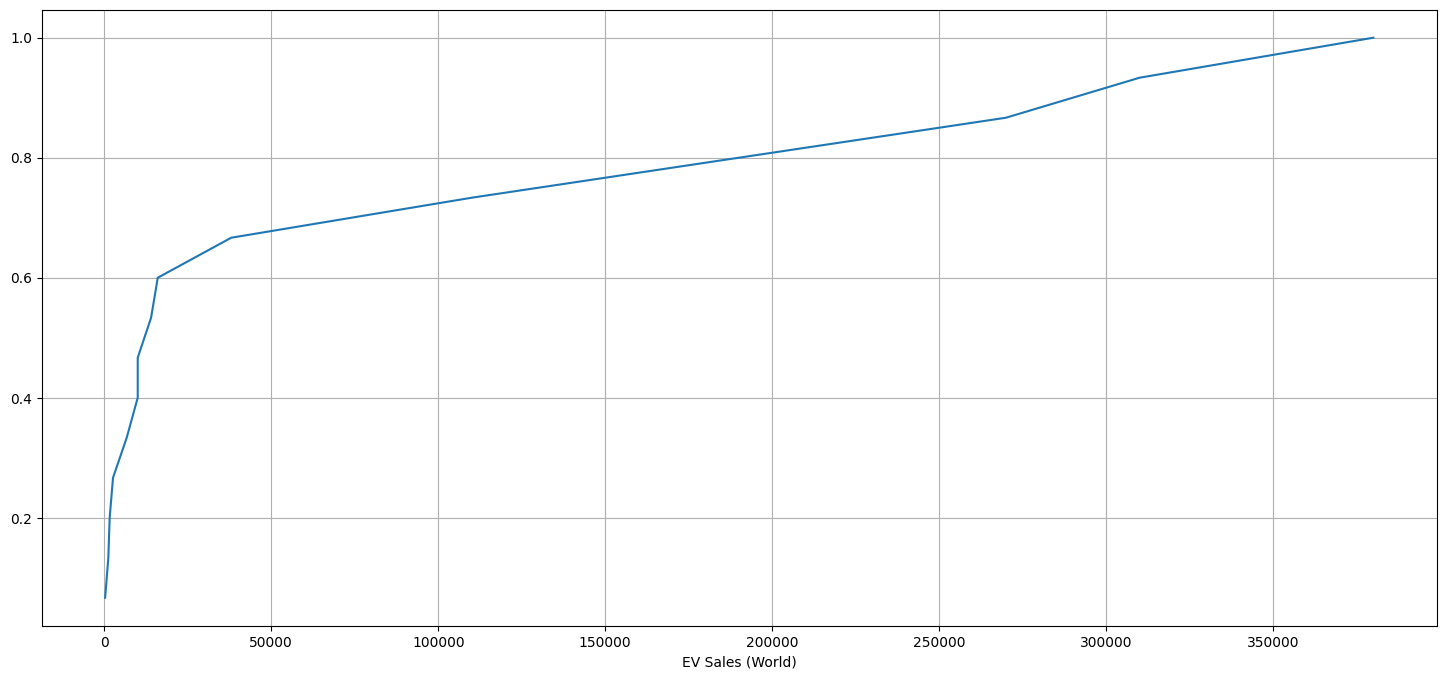

In [ ]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df1['EV Sales (UK)'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('EV Sales (World)');

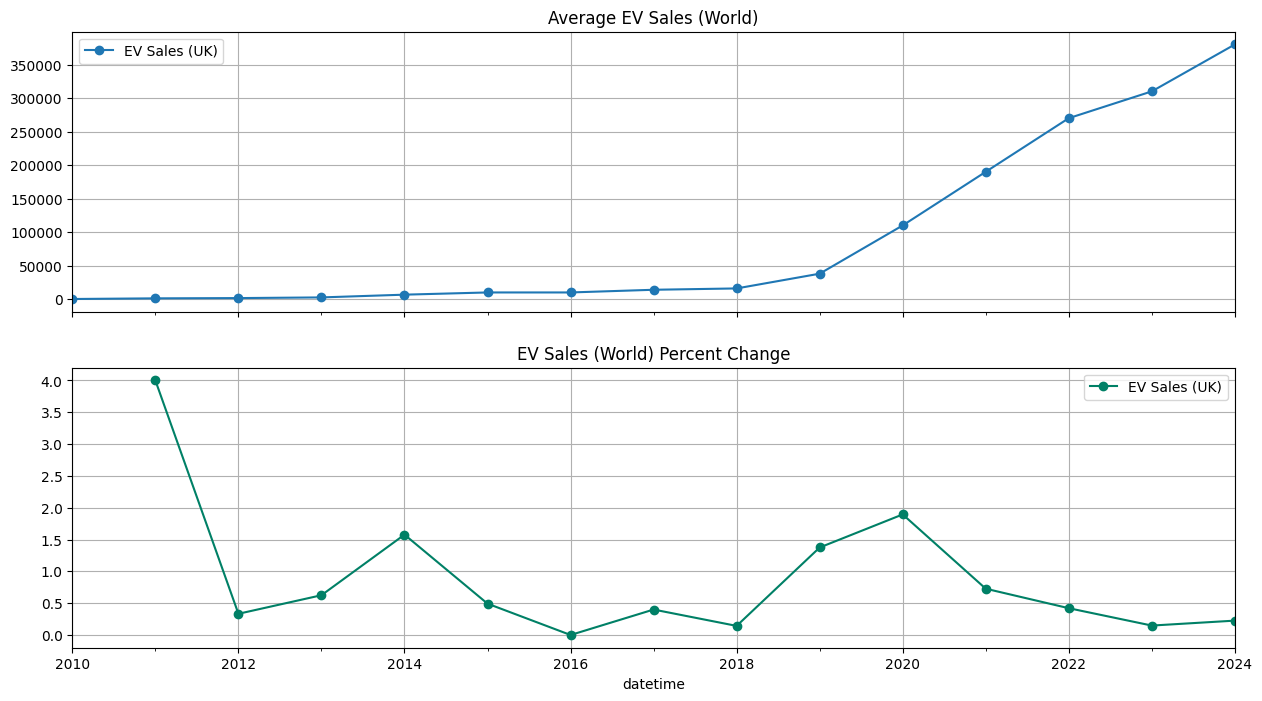

In [ ]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df1.index)["EV Sales (UK)"].mean()
pct_change = df.groupby(df1.index)["EV Sales (UK)"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average EV Sales (World)",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="EV Sales (World) Percent Change",grid=True)

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

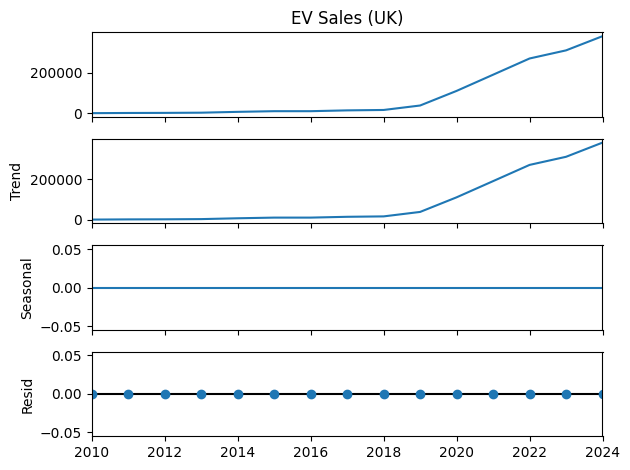

In [ ]:
decomposition = seasonal_decompose(df['EV Sales (UK)'],model='additive')
decomposition.plot();

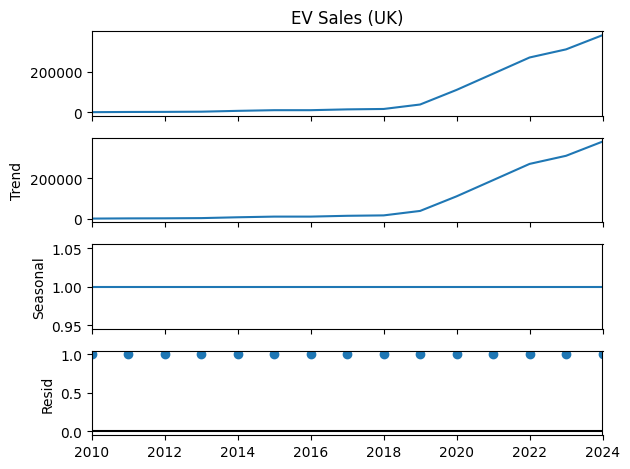

In [ ]:
decomposition = seasonal_decompose(df['EV Sales (UK)'],model='multiplicative')
decomposition.plot();

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1500x1500 with 0 Axes>

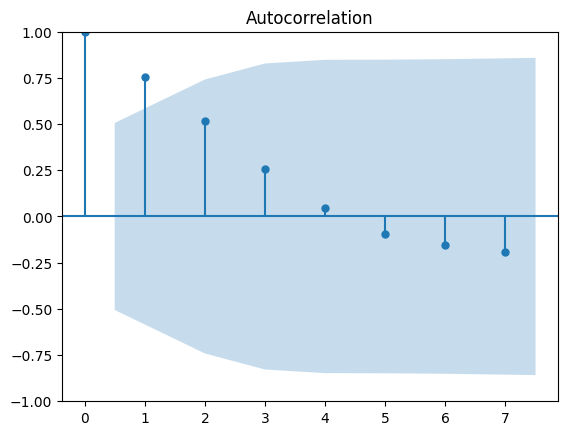

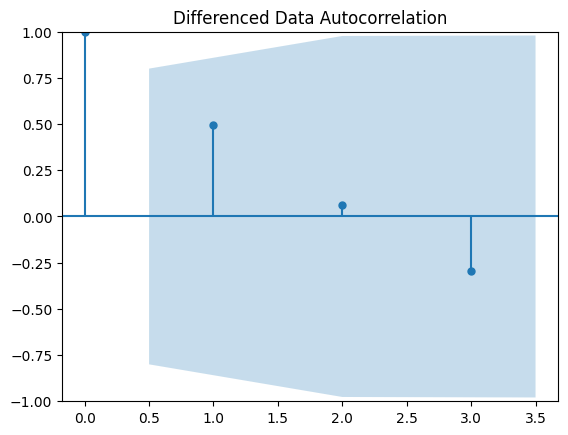

In [ ]:
plt.figure(figsize = (15, 15))

plot_acf(df['EV Sales (UK)'])#,lags=50)
plot_acf(df['EV Sales (UK)'].diff(9).dropna(),title='Differenced Data Autocorrelation')
plt.show()

In [ ]:
df1

,EV Sales (UK)
datetime,
2010-01-01,240
2011-01-01,1200
2012-01-01,1600
2013-01-01,2600
2014-01-01,6700
2015-01-01,10000
2016-01-01,10000
2017-01-01,14000
2018-01-01,16000


In [ ]:
15*(0.7)

10.5

In [ ]:
df1.head()

,EV Sales (UK)
datetime,
2010-01-01,240
2011-01-01,1200
2012-01-01,1600
2013-01-01,2600
2014-01-01,6700


In [ ]:
train=df[df1.index.year < 2019]
test=df[df1.index.year >= 2019]

In [ ]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [ ]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Year,EV Sales (UK)
datetime,,
2010-01-01,2010,240
2011-01-01,2011,1200
2012-01-01,2012,1600
2013-01-01,2013,2600
2014-01-01,2014,6700


Last few rows of Training Data


,Year,EV Sales (UK)
datetime,,
2014-01-01,2014,6700
2015-01-01,2015,10000
2016-01-01,2016,10000
2017-01-01,2017,14000
2018-01-01,2018,16000


First few rows of Test Data


,Year,EV Sales (UK)
datetime,,
2019-01-01,2019,38000
2020-01-01,2020,110000
2021-01-01,2021,190000
2022-01-01,2022,270000
2023-01-01,2023,310000


Last few rows of Test Data


,Year,EV Sales (UK)
datetime,,
2020-01-01,2020,110000
2021-01-01,2021,190000
2022-01-01,2022,270000
2023-01-01,2023,310000
2024-01-01,2024,380000


In [ ]:
train = train.drop(columns='Year')

In [ ]:
test = test.drop(columns='Year')

In [ ]:
train.head()
test.head()

,EV Sales (UK)
datetime,
2019-01-01,38000
2020-01-01,110000
2021-01-01,190000
2022-01-01,270000
2023-01-01,310000


In [ ]:
print(train.shape)
print(test.shape)

(9, 1)
(6, 1)


In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
train['EV Sales (UK)']

,EV Sales (UK)
datetime,
2010-01-01,240
2011-01-01,1200
2012-01-01,1600
2013-01-01,2600
2014-01-01,6700
2015-01-01,10000
2016-01-01,10000
2017-01-01,14000
2018-01-01,16000


In [ ]:
#from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#from statsmodels.tsa.arima.model.ARIMA import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['EV Sales (UK)'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    # Use pd.concat instead of append
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 1, 0) - AIC:149.8534139011615
ARIMA(0, 1, 1) - AIC:149.43993994817362


/tmp/ipython-input-4047713490.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 2) - AIC:151.67908915231422
ARIMA(1, 1, 0) - AIC:148.977611475638
ARIMA(1, 1, 1) - AIC:149.1863820966842


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 1, 2) - AIC:151.09924545794775
ARIMA(2, 1, 0) - AIC:150.29046042810091
ARIMA(2, 1, 1) - AIC:151.15213130207866
ARIMA(2, 1, 2) - AIC:153.12790248114203


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
3,"(1, 1, 0)",148.977611
4,"(1, 1, 1)",149.186382
1,"(0, 1, 1)",149.439940
0,"(0, 1, 0)",149.853414
6,"(2, 1, 0)",150.290460
5,"(1, 1, 2)",151.099245
7,"(2, 1, 1)",151.152131
2,"(0, 1, 2)",151.679089
8,"(2, 1, 2)",153.127902


In [ ]:
auto_ARIMA = ARIMA(train['EV Sales (UK)'], order=(1,1,0))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:          EV Sales (UK)   No. Observations:                    9
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -72.489
Date:                Wed, 24 Sep 2025   AIC                            148.978
Time:                        07:37:50   BIC                            149.136
Sample:                    01-01-2010   HQIC                           147.906
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5716      0.592      0.965      0.334      -0.589       1.732
sigma2      4.803e+06   2.81e+06      1.708      0.088   -7.07e+05    1.03e+07
Ljung-Box (L1) (Q):                   2.52   Jarque-

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['EV Sales (UK)'],predicted_auto_ARIMA)
print(rmse**0.5)

229988.88015872423


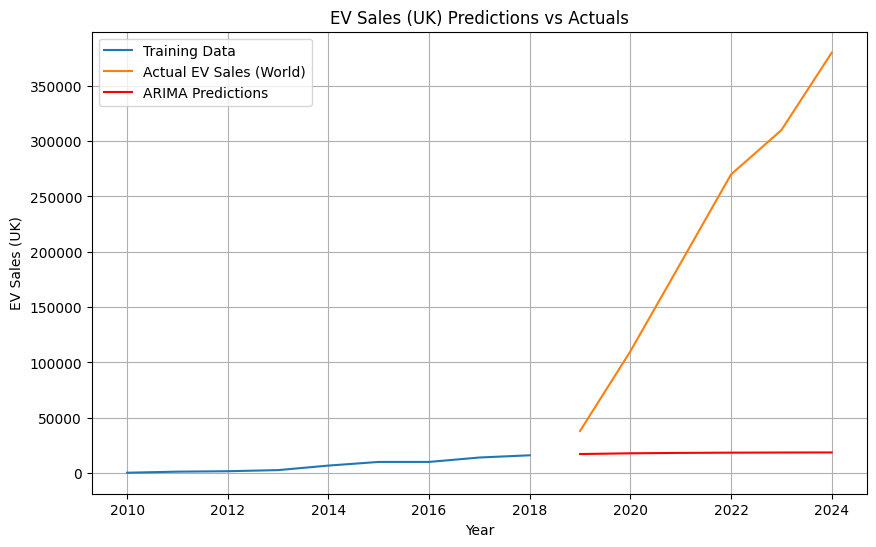

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['EV Sales (UK)'], label='Training Data')
plt.plot(test.index, test['EV Sales (UK)'], label='Actual EV Sales (World)')
plt.plot(test.index, predicted_auto_ARIMA, label='ARIMA Predictions', color='red')
plt.title('EV Sales (UK) Predictions vs Actuals')
plt.xlabel('Year')
plt.ylabel('EV Sales (UK)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,0)'])

resultsDf

,RMSE
"ARIMA(1,1,0)",5.289488e+10


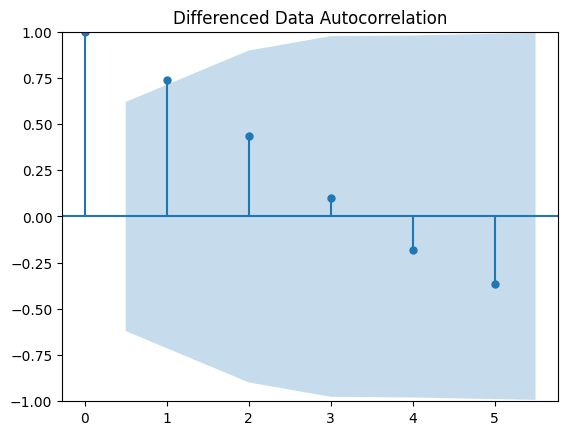

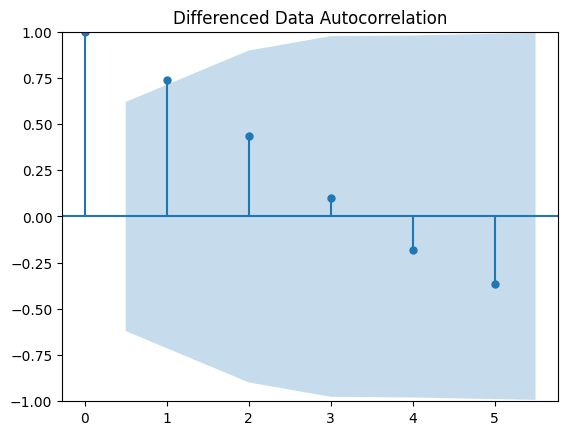

In [ ]:
plot_acf(df1['EV Sales (UK)'].diff(5).dropna(),title='Differenced Data Autocorrelation')


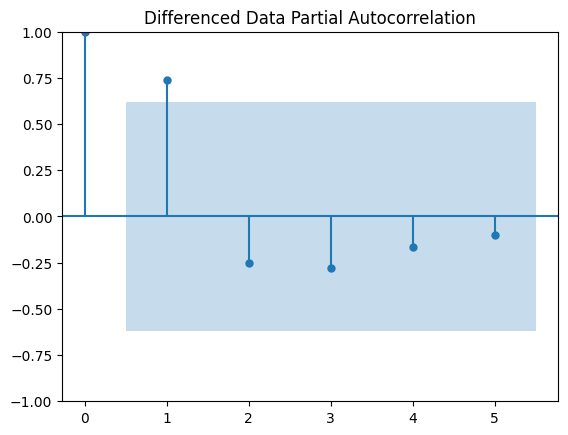

In [ ]:
plot_pacf(df1['EV Sales (UK)'].diff(5).dropna(),title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
manual_ARIMA = ARIMA(train['EV Sales (UK)'].astype('float64'), order=(2,5,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarni

                               SARIMAX Results                                
Dep. Variable:          EV Sales (UK)   No. Observations:                    9
Model:                 ARIMA(2, 5, 2)   Log Likelihood                 -40.869
Date:                Wed, 24 Sep 2025   AIC                             91.739
Time:                        07:37:52   BIC                             88.670
Sample:                    01-01-2010   HQIC                            85.005
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8089     13.781     -0.059      0.953     -27.818      26.201
ar.L2         -1.0000      0.980     -1.020      0.308      -2.921       0.921
ma.L1         -1.0709     13.563     -0.079      0.9

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [ ]:
predicted_manual_ARIMA

,predicted_mean
2019-01-01,11282.818168
2020-01-01,6788.757373
2021-01-01,-1858.867398
2022-01-01,-22145.258930
2023-01-01,-48329.170527
2024-01-01,-82864.080707


In [ ]:
rmse = mean_squared_error(test['EV Sales (UK)'],predicted_manual_ARIMA)
print(rmse)

79361332897.32538


In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,5,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,0)",5.289488e+10
"ARIMA(2,5,2)",7.936133e+10



Root Mean Squared Error (RMSE): 281711.44


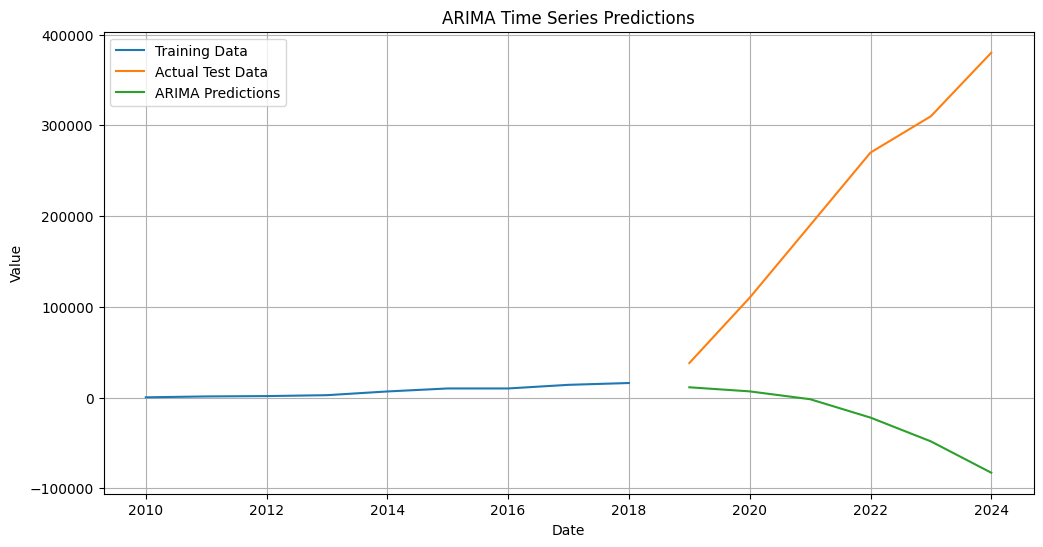

In [ ]:
forecast_steps = len(test)
predictions = results_manual_ARIMA.get_forecast(steps=forecast_steps)

# 5. Evaluate the model (optional)
rmse = np.sqrt(mean_squared_error(test['EV Sales (UK)'], predictions.predicted_mean))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

# 6. Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['EV Sales (UK)'], label='Training Data')
plt.plot(test.index, test['EV Sales (UK)'], label='Actual Test Data')
plt.plot(predictions.predicted_mean.index, predictions.predicted_mean, label='ARIMA Predictions')
plt.title('ARIMA Time Series Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**Forecast**

In [ ]:
order = (2, 5, 2)

model = ARIMA(df1, order=order)
model_fit = model.fit()

print("ARIMA Model Summary:")
print(model_fit.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          EV Sales (UK)   No. Observations:                   15
Model:                 ARIMA(2, 5, 2)   Log Likelihood                   0.000
Date:                Wed, 24 Sep 2025   AIC                             10.000
Time:                        07:37:52   BIC                             11.513
Sample:                    01-01-2010   HQIC                             8.340
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2              -0         -0        nan        nan           0          -0
ma.L1               0         -

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

In [ ]:
# 4. Forecast for a future time period
# Define the number of steps to forecast into the future
forecast_steps = 6

# Generate the forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a future date range for the forecast index
last_date = df1.index[-1]
future_index = pd.to_datetime(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Y'))[1:] # Exclude the last_date itself

# Create a Series for the forecast with the correct index
forecast_series = pd.Series(forecast.values, index=future_index)

/tmp/ipython-input-4206370668.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_index = pd.to_datetime(pd.date_range(start=last_date, periods=forecast_steps + 1, freq='Y'))[1:] # Exclude the last_date itself


In [ ]:
forecast_mean = forecast
conf_int = model_fit.conf_int(alpha=0.05) # 95% confidence interval

print("Forecast Mean:")
print(forecast_mean)
print("\n95% Confidence Interval:")
print(conf_int)

Forecast Mean:
2025-01-01    2.312740e+06
2026-01-01    3.036800e+06
2027-01-01    3.918400e+06
2028-01-01    4.978800e+06
2029-01-01    6.240600e+06
2030-01-01    7.727740e+06
Freq: YS-JAN, Name: predicted_mean, dtype: float64

95% Confidence Interval:
                   0             1
ar.L1   0.000000e+00 -0.000000e+00
ar.L2   0.000000e+00 -0.000000e+00
ma.L1   0.000000e+00  0.000000e+00
ma.L2   0.000000e+00 -0.000000e+00
sigma2  1.000000e-10  1.000000e-10


In [ ]:
predictions.summary_frame(alpha=0.05).head()

EV Sales (UK),mean,mean_se,mean_ci_lower,mean_ci_upper
2019-01-01,11282.818168,10314.580040,-8933.387225,31499.023561
2020-01-01,6788.757373,33800.594414,-59459.190335,73036.705080
2021-01-01,-1858.867398,75372.310581,-149585.881568,145868.146771
2022-01-01,-22145.258930,150053.201254,-316244.129154,271953.611293
2023-01-01,-48329.170527,271592.981358,-580641.632443,483983.291390


In [ ]:
forecast_series

,0
2025-12-31,2.312740e+06
2026-12-31,3.036800e+06
2027-12-31,3.918400e+06
2028-12-31,4.978800e+06
2029-12-31,6.240600e+06
2030-12-31,7.727740e+06


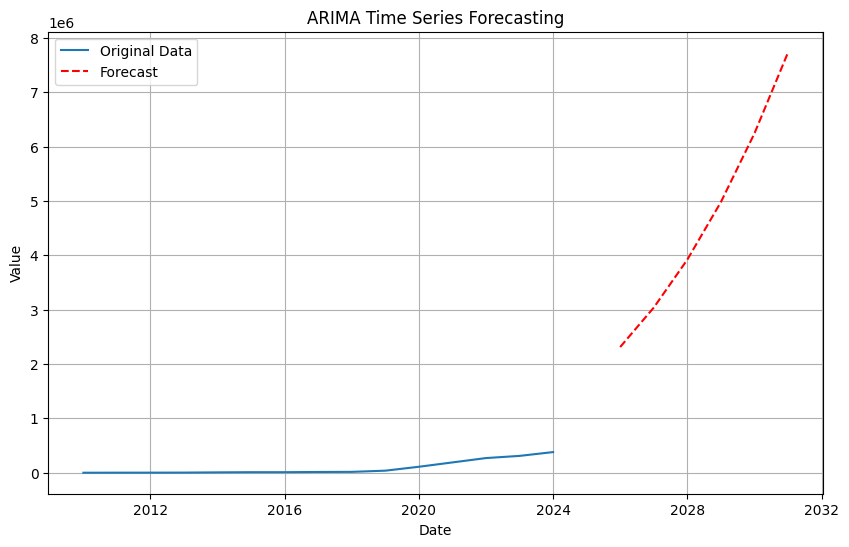

In [ ]:
# 5. Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df1, label='Original Data')
plt.plot(forecast_series, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
